In [1]:
import sys

In [2]:
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [3]:
import pkg_resources
#
installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
print("\n".join(installed_packages_list))

aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
anaconda-client==1.9.0
anaconda-navigator==2.1.4
anaconda-project==0.10.2
anyio==3.5.0
appdirs==1.4.4
argon2-cffi-bindings==21.2.0
argon2-cffi==21.3.0
arrow==1.2.2
astroid==2.6.6
astropy==5.0.4
asttokens==2.0.5
async-timeout==4.0.1
atomicwrites==1.4.0
attrs==21.4.0
automat==20.2.0
autopep8==1.6.0
babel==2.9.1
backcall==0.2.0
backports.functools-lru-cache==1.6.4
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.2.0
beautifulsoup4==4.11.1
binaryornot==0.4.4
bitarray==2.4.1
bkcharts==0.2
black==19.10b0
bleach==4.1.0
bokeh==2.4.2
boto3==1.21.32
botocore==1.24.32
bottleneck==1.3.4
brotlipy==0.7.0
cachetools==4.2.2
certifi==2021.10.8
cffi==1.15.0
chardet==4.0.0
charset-normalizer==2.0.4
click==8.0.4
cloudpickle==2.0.0
clyent==1.2.2
colorama==0.4.4
colorcet==2.0.6
comtypes==1.1.10
conda-build==3.21.8
conda-content-trust==0+unknown
conda-pack==0.6.0
conda-package-handling==1.8.1
conda-repo-cli==1.0.4
conda-token==0.3.0
conda-verify

In [4]:
import numpy as np
import pandas as pd
#
np.random.seed(1)
#
beta_0 = 1
beta_1 = 2
N = 50
#
x = np.random.normal(loc = 0, scale = 5, size = N)
eps = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + eps
#Conditional expectation of Y:
y_ce = beta_0 + beta_1 * x

In [5]:
print(pd.DataFrame({'y_ce':y_ce, 'y':y, 'x':x}).head(6))

        y_ce          y          x
0  17.243454  17.543624   8.121727
1  -5.117564  -5.469814  -3.058782
2  -4.281718  -5.424236  -2.640859
3  -9.729686 -10.079029  -5.364843
4   9.654076   9.445182   4.327038
5 -22.015387 -21.428764 -11.507693


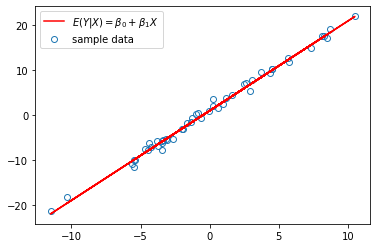

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#
_ = plt.figure(0)
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor='none');
_ = plt.plot(x, y_ce, linestyle = "-", color = "red");
legend_lines = [Line2D([0], [0], color = "red", 
                        label='$E(Y|X) = \\beta_0 + \\beta_1 X$'),
                Line2D([0], [0], linestyle = "None", markerfacecolor = "None",
                      marker = "o", label='sample data')]
_ = plt.legend(handles = legend_lines, loc = 'upper left')
plt.show()

3.2.2 Derivation of the Ordinary Least Squares Estimator

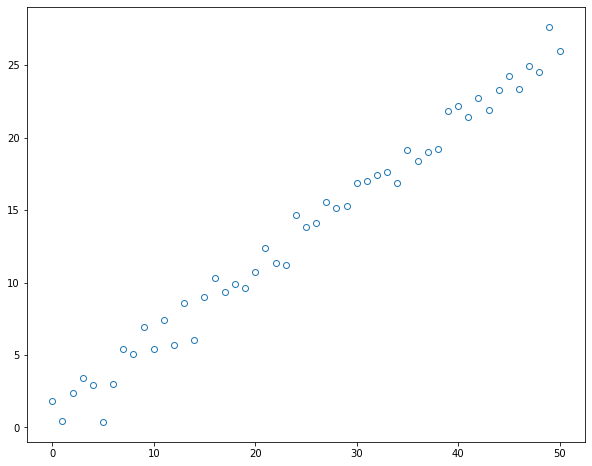

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
np.random.seed(234)
# Set the coefficients:
N = 50
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.arange(start = 0, stop = N + 1, step = 1)
#x = list(range(0, N + 1)) # not np.ndarray 
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e
# Plot the data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'none')
plt.show()

The Method of Moments (MM) 
OR
THE OLS - System of Partial Derivatives Method 

will both yield the same results for our estimators


In [8]:
beta_1_est = np.cov(x, y, bias = True)[0][1] / np.var(x)
beta_0_est = np.mean(y) - beta_1_est * np.mean(x)
print("Estimated beta_0 = " + str(beta_0_est) + ". True beta_0 = " + str(beta_0))

Estimated beta_0 = 0.8385362094098401. True beta_0 = 1


Note that bias = True calculates the population covariance (with division by  
N
 ), whereas bias = False calculates the sample covariance (with  
N
−
1
  instead of  
N
 ) and the variance function var() calculates the population variance. Since we are dividing the covariance by the variance, we need to calculate both of them for the population (or the sample, since we are dividing the covariance by the variance):

In [9]:
print("With bias = False (default) the estimate of beta_1 is biased: \n\t" + 
      str(np.cov(x, y)[0][1] / np.var(x)))

With bias = False (default) the estimate of beta_1 is biased: 
	0.5201206393962936


In [10]:
print("With sample variance the estimate of beta_1 is unbiased: \n\t" + 
      str(np.cov(x, y)[0][1] / np.var(x, ddof = 1)))

With sample variance the estimate of beta_1 is unbiased: 
	0.5099221954865624


![](2022-06-29-21-30-11.png)

3.2.2.3 OLS - The Matrix Method

Remember the matrix notation for OLS as it contains both b0 and b1 (and potentially all other estimators for multiple linear regression), instead of using Method of moment or partial derative method which only apply to 1 estimator

In [11]:
import statsmodels.api as sm
#
x_mat = sm.add_constant(x)  # Add a constant column - not optional!
lm_model = sm.OLS(y, x_mat) # Create the OLS regression object
lm_fit = lm_model.fit()     # Estimate the parameters
print(lm_fit.params)       # Extract the parameter estimates

[0.83853621 0.5099222 ]


Absolument important: Fitted values: we are gonna pass our actual X to the OLS model. 
the residuals will be the difference between Yi and the fitted result " Yi hat" 

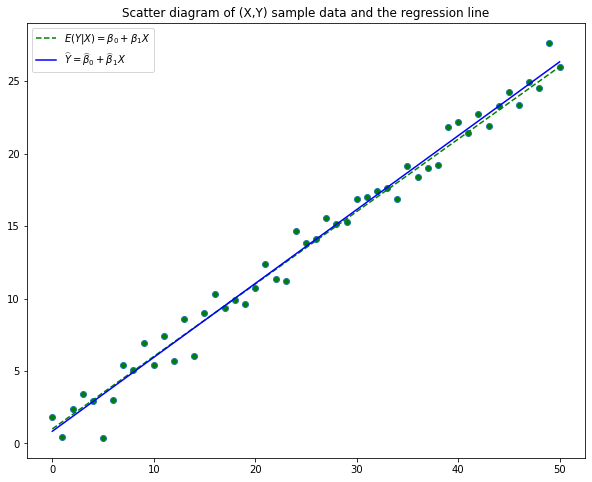

In [12]:
# The unknown DGP:
y_dgp = beta_0 + beta_1 * x
# The fitted values:
y_fit = beta_0_est + beta_1_est * x
# Plot the sample data
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'green')
_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
# Plot the Unknown Population regression:
_ = plt.plot(x, y_dgp, linestyle = "--", color = "green", 
              label='$E(Y|X) = \\beta_0 + \\beta_1 X$')
# Plot the fitted regression line:
_ = plt.plot(x, y_fit, linestyle = "-", color = "blue",
              label='$\widehat{Y} = \widehat{\\beta}_0 + \widehat{\\beta}_1 X$')
_ = plt.legend()
plt.show()

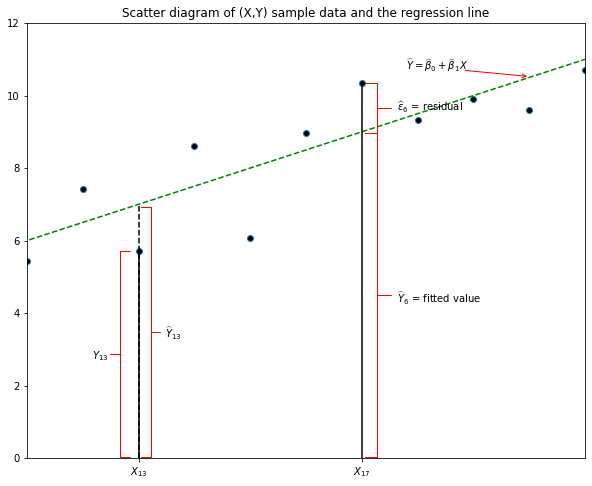

In [13]:
_ = plt.figure(num = 1, figsize=(10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'black')
_ = plt.ylim(ymin = 0, ymax = 12)
_ = plt.xlim(xmin = 10, xmax = 20)
_ = plt.title("Scatter diagram of (X,Y) sample data and the regression line")
_ = plt.plot(x, y_dgp, linestyle = "--", color = "green")
# Add Axis labels and ticks at specific positions:
_ = plt.xticks([x[12], x[16]], ["$X_{13}$", "$X_{17}$"])
# Add vertical lines:
_ = plt.plot([x[12], x[12]], [0, y_fit[12]], '--', color = "black")
_ = plt.plot([x[12], x[12]], [0, y[12]], '-', color = "black")
_ = plt.plot([x[16], x[16]], [0, y[16]], '-', color = "black")
# Add some brackets:
_ = plt.annotate("", xy = (x[12]*0.955, y[12] / 2), 
             xytext = (x[12]*0.975, y[12] / 2),
             arrowprops = dict(arrowstyle = "]-, widthA=10.3,lengthA=1",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[12]*1.015, y_fit[12] / 2),
             xytext = (x[12]*1.035, y_fit[12] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=12.5,lengthB=1",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, y_fit[16] / 2), 
             xytext = (x[16]*1.035, y_fit[16] / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=16.2,lengthB=1.2",
                               connectionstyle = "arc", color='red'))
_ = plt.annotate("", xy = (x[16]*1.015, (y[16] + y_fit[16]) / 2),
             xytext = (x[16]*1.035, (y[16] + y_fit[16]) / 2),
             arrowprops = dict(arrowstyle = "-[, widthB=2.5,lengthB=1.2",
                               connectionstyle = "arc", color='red'))
# Add Actual, Fitted and Residual indicator text:
_ = plt.text(x[12]*0.93, y[12] / 2.1, r'$Y_{13}$', fontsize = 10)
_ = plt.text(x[12]*1.04, y_fit[12] / 2.1, r'$\widehat{Y}_{13}$', fontsize = 10)
_ = plt.text(x[16]*1.04, y_fit[16] / 2.1, 
  r'$\widehat{Y}_6$ = fitted value', fontsize = 10)
_ = plt.text(x[16]*1.04, (y[16] + y_fit[16]) / 2.02, 
  r'$\widehat{\epsilon}_6$ = residual', fontsize = 10)
# Add Regression line
_ = plt.text(x[17] - 0.2, y[20], 
  r'$\widehat{Y} = \widehat{\beta}_0 + \widehat{\beta}_1 X$', fontsize = 10)
_ = plt.annotate("", xy = (x[19], y_fit[19]), xytext = (x[18]*0.99, y[20]),
            arrowprops = dict(arrowstyle = "->", 
                              connectionstyle = "arc", color='red'))
plt.show()

3.2.4 Properties of the OLS estimator

In [14]:
resid = y - y_fit
print("Sum of the residuals: " + str(sum(resid)))

Sum of the residuals: 7.904787935331115e-14


In [15]:
print("Sum of X*resid: " + str(sum(np.array(resid) * np.array(x))))

Sum of X*resid: 2.4371615836571436e-12


In [16]:
print("Predicted value with mean(X): " + str(beta_0_est + beta_1_est * np.mean(x))) , print("Sample mean of Y: " + str(np.mean(y)))



Predicted value with mean(X): 13.5865910965739
Sample mean of Y: 13.5865910965739


(None, None)

OLS estimators are BLUE
Best: smallest variance  | Linear ( can be expressed as y=ax+b)  | Unbiaised : E[e hat] = e | Estimators 


They are also consistent:

Unbiased estimators are not necessarily consistent, but those whose variances shrink to zero as the sample size grows are consistent. In other words:

In [17]:
sigma2_est = sum(resid**2) / (len(x) - 2)
var_beta = sigma2_est * np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
print(np.sqrt(np.diag(var_beta)))

[0.26999713 0.00930656]


3.2.4.7 Practical illustration of the OLS properties

We will return to our example in this chapter. We have recently proved the unbiasedness and consistency of OLS estimators. To illustrate these properties empirically, we will generate 5000 replications (i.e. different samples) for each of the different sample sizes   

In [18]:
np.random.seed(1)
# Set the sample size:
N = [10, 100, 1000]
#
beta_0_est = []
beta_1_est = []
# Generate samples of different sizes:
for n in N:
    x = np.arange(start = 0, stop = n + 1, step = 1)
    x_mat = np.column_stack((np.ones(len(x)), x))
    xtx = np.dot(np.transpose(x_mat), x_mat)
    # Repeatedly generate a random sample and estimate the parameters
    beta_0_temp = []
    beta_1_temp = []
    for smpl in range(0, 5000):
        # Generate Y:
        e = np.random.normal(loc = 0, scale = 1, size = len(x))
        y = beta_0 + beta_1 * x + e
        # Estimate the parameters:
        xty = np.dot(np.transpose(x_mat), y)
        beta_mat = np.dot(np.linalg.inv(xtx), xty)
        # Save the estimated parameters:
        beta_0_temp = np.append(beta_0_temp, [beta_mat[0]])
        beta_1_temp = np.append(beta_1_temp, [beta_mat[1]])
    # Save all the estimated parameters to one parameter matrix
    # each column represents the different sample size from N:
    if len(beta_0_est) == 0 and len(beta_1_est) == 0:
        beta_0_est = beta_0_temp
        beta_1_est = beta_1_temp
    else:
        beta_0_est = np.vstack((beta_0_est, beta_0_temp))
        beta_1_est = np.vstack((beta_1_est, beta_1_temp))

print("True beta_0 = " + str(beta_0) + ". True beta_1 = " + str(beta_1))


for i in range(0, len(N)):
    print("With N = " + str(N[i]) + ":" +
          "\n\t the AVERAGE of the estimated parameters:" +
          "\n\t\t beta_0: " + str(np.round(np.mean(beta_0_est[i]), 5)) +
          "\n\t\t beta_1: " + str(np.round(np.mean(beta_1_est[i]), 5)))

True beta_0 = 1. True beta_1 = 0.5
With N = 10:
	 the AVERAGE of the estimated parameters:
		 beta_0: 1.00437
		 beta_1: 0.49984
With N = 100:
	 the AVERAGE of the estimated parameters:
		 beta_0: 0.99789
		 beta_1: 0.50006
With N = 1000:
	 the AVERAGE of the estimated parameters:
		 beta_0: 0.99957
		 beta_1: 0.5


In [19]:
for i in range(0, len(N)):    
    print("With N = " + str(N[i]) + ":" +
          "\n\t the VARIANCE of the estimated parameters:" +
          "\n\t\t beta_0: " + str(np.round(np.var(beta_0_est[i]), 5)) + 
          "\n\t\t beta_1: " + str(np.round(np.var(beta_1_est[i]), 5)))
#

With N = 10:
	 the VARIANCE of the estimated parameters:
		 beta_0: 0.3178
		 beta_1: 0.00904
With N = 100:
	 the VARIANCE of the estimated parameters:
		 beta_0: 0.03896
		 beta_1: 1e-05
With N = 1000:
	 the VARIANCE of the estimated parameters:
		 beta_0: 0.00394
		 beta_1: 0.0


In [20]:
np.random.seed(123)
# Set the coefficients:
N = 300
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.random.normal(loc = 5, scale = 2, size = N)
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e
# Estimate the model:
x_mat = np.column_stack((np.ones(len(x)), x))
beta_mat = np.dot(np.linalg.inv(np.dot(np.transpose(x_mat), x_mat)), 
                  np.dot(np.transpose(x_mat), y))
print(beta_mat)

[1.21815132 0.45602676]


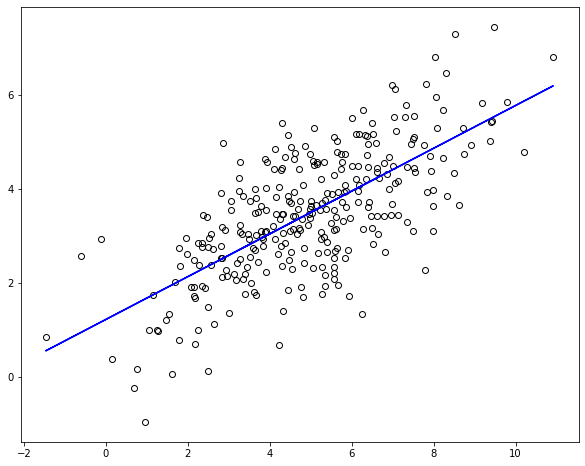

In [21]:
# Calcualte the fitted values
y_fit = beta_mat[0] + beta_mat[1] * x
# Plot the data and the fitted regression:
_ = plt.figure(num = 3, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'None',
              markeredgecolor = "black")
_ = plt.plot(x, y_fit, linestyle = "-", color = "blue")
plt.show()

In [22]:
np.random.seed(123)
# Set the coefficients:
N = 300
beta_0 = 1
beta_1 = 0.5
# Generate sample data:
x = np.random.choice(list(range(1, 51)), size = N, replace = True)
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = beta_0 + beta_1 * x + e
# Estimate the model:
x_mat = np.column_stack((np.ones(len(x)), x))
beta_mat = np.dot(np.linalg.inv(np.dot(np.transpose(x_mat), x_mat)), 
                  np.dot(np.transpose(x_mat), y))
print(beta_mat)

[1.10062011 0.49214627]


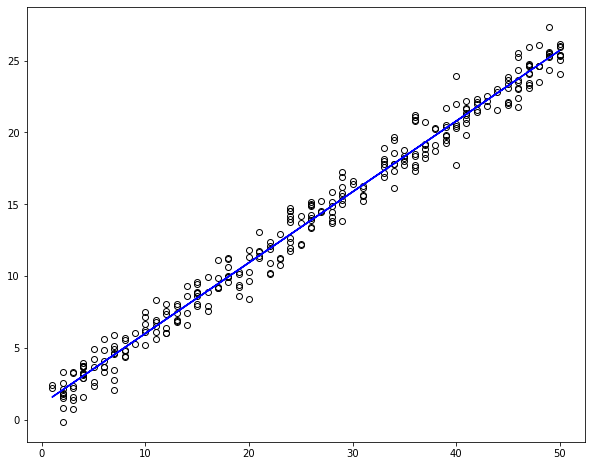

In [23]:
# Calcualte the fitted values
y_fit = beta_mat[0] + beta_mat[1] * x
# Plot the data and the fitted regression:
_ = plt.figure(num = 4, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", markerfacecolor = 'None',
              markeredgecolor = "black")
_ = plt.plot(x, y_fit, linestyle = "-", color = "blue")
plt.show()

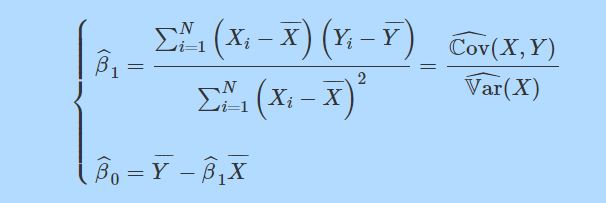

In [24]:
from IPython.display import Image
Image('Univariable_OLS_estimators.jpg')

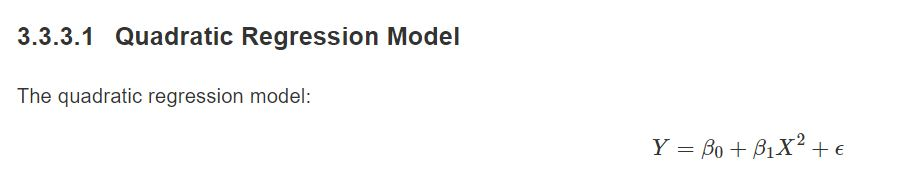

In [25]:
from IPython.display import Image
Image('QRM.jpg')

3.3.3.2 Log-Linear Regression Model

In [27]:
np.random.seed(123)
#
N = 1000
beta_0 = 0.8
beta_1 = 4
x = np.linspace(start = 0, stop = 1, num = N)
e = np.random.normal(loc = 0, scale = 1, size = len(x))
y = np.exp(beta_0 + beta_1 * x + e)
#
fig = plt.figure(num = 3, figsize = (10, 8))
ax = fig.add_subplot('121')
_ = ax.hist(y, bins = 20, 
    histtype = 'bar', color = "cornflowerblue", ec = 'black')
_ = ax.set_title("Histogram of $Y$")
ax = fig.add_subplot('122')
_ = ax.hist(np.log(y), bins = 20, 
    histtype = 'bar', color = "cornflowerblue", ec = 'black')
_ = ax.set_title("Histogram of $\\log(Y)$")
plt.show()

ValueError: Single argument to subplot must be a three-digit integer, not '121'

<Figure size 720x576 with 0 Axes>

In [28]:
np.random.seed(123)
#
beta_0 = 1200
beta_1 = -250
x = np.array(range(18, 51))
max_x = 80
e = np.random.normal(loc = 0, scale = 50, size = len(x))
y = beta_0 + beta_1 * np.log(x) + e
# Estimate a Linear-Linear and Linear-Log model:
mdl_1 = sm.OLS(y, sm.add_constant(x)).fit()
y1 = mdl_1.params[0] + mdl_1.params[1] * np.array(range(18, max_x + 1))
mdl_2 = sm.OLS(y, sm.add_constant(np.log(x))).fit()
y2 = mdl_2.params[0] + mdl_2.params[1] * np.log(np.array(range(18, max_x + 1)))

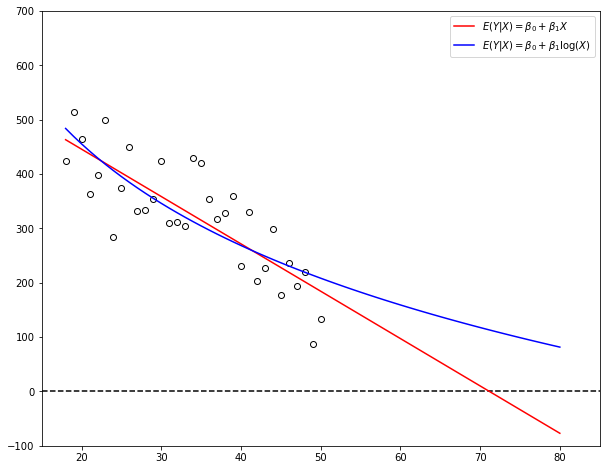

In [29]:



# Plot the sample data and the fitted values:
_ = plt.figure(num = 5, figsize = (10, 8))
_ = plt.plot(x, y, linestyle = "None", marker = "o", color = "black", markerfacecolor = 'None')
_ = plt.ylim((-100, 700))
_ = plt.xlim((15, max_x + 5))
_ = plt.axhline(y = 0, linestyle = "--", color = "black")
_ = plt.plot(np.array(range(18, max_x + 1)), y1, 
         linestyle = "-", color = "red", label = "$E(Y|X) = \\beta_0 + \\beta_1 X$")
_ = plt.plot(np.array(range(18, max_x + 1)), y2, 
         linestyle = "-", color = "blue", label = "$E(Y|X) = \\beta_0 + \\beta_1 \\log(X)$")
_ = plt.legend()
plt.show()

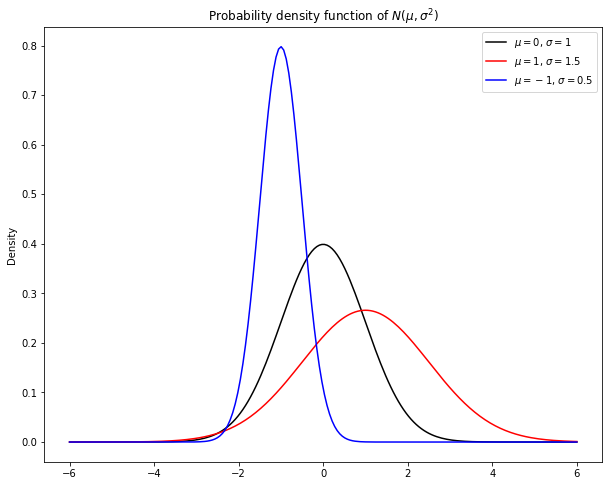

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Calculate the probability density function for values of x in [-6;6]
x = np.linspace(start = -6, stop = 6, num = 200)
#
_ = plt.figure(num = 0, figsize = (10, 8))
_ = plt.plot(x, norm.pdf(x, loc = 0, scale = 1), color = "black", 
         label = "$\\mu=0$, $\sigma =1$")
_ = plt.plot(x, norm.pdf(x, loc = 1, scale = 1.5), color = "red", 
         label = "$\\mu=1$, $\sigma =1.5$")
_ = plt.plot(x, norm.pdf(x, loc = -1, scale = 0.5), color = "blue", 
         label = "$\\mu=-1$, $\sigma =0.5$")
_ = plt.title("Probability density function of $N(\\mu, \\sigma^2)$")
_ = plt.ylabel("Density")
_ = plt.legend()
plt.show()

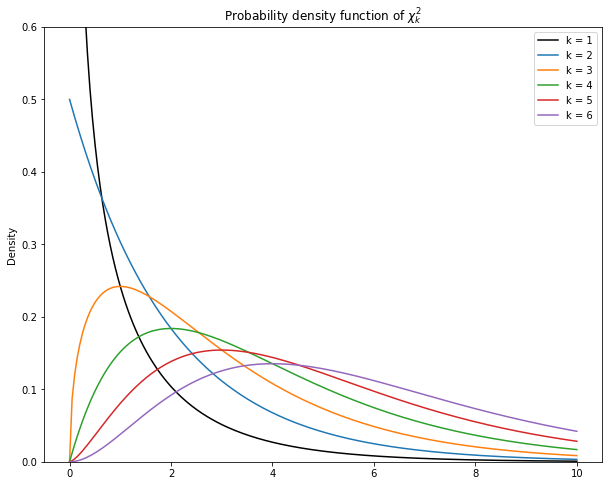

In [31]:
from scipy.stats import chi2
# Calculate the probability density function for values of x in [0;10]
x = np.linspace(start = 0, stop = 10, num = 200)
#
_ = plt.figure(num = 1, figsize = (10, 8))
_ = plt.plot(x, chi2.pdf(x, df = 1), color = "black", label = "k = 1")
for i in range(2, 7):
    _ = plt.plot(x, chi2.pdf(x, df = i), label = "k = " + str(i))
_ = plt.ylim((0, 0.6))    
_ = plt.title("Probability density function of $\\chi^2_k$")
_ = plt.ylabel("Density")
_ = plt.legend()
plt.show()